In [0]:
# Standard IPython notebook imports
%matplotlib inline

import os

import httpimport
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook
import scipy.stats as sstats
import math

import seaborn as sns
from sklearn import datasets

Zadanie 0. (rozgrzewkowe, 1 punkt, zadanie należy przesłać emailem)

Utwórz skrypt definiujący poniższe zmienne:

a = [1, 2, 3, 4, …, 100] (wektor złożony z liczb całkowitych od 1 do 100)

b = [1, 3, 5, 7, …, 99] (wektor złożony z liczb całkowitych nieparzystych od 1 do 99)

c = [-1.00 * π, -0.99 * π, …, -0.01 * π, 0, 0.01 * π, …, 0.99 * π, 1.00 * π]

d = [-1.00 * π, -0.99 * π, …, -0.01 * π, 0.01 * π, …, 0.99 * π, 1.00 * π]

e = [e1, e2, …, e100], gdzie ei = sin(i), jeśli sin(i) > 0, lub ei = 0 w przeciwnym przypadku


In [0]:
a = np.arange(1,101)
b = np.arange(1,100,2)
c = np.array([x * math.pi / 100 for x in range(-100,101)])
d = np.array([x * math.pi / 100 for x in range(-100,0)] + [x * math.pi / 100 for x in range(1,101)])
e = np.array([math.sin(x) if math.sin(x) > 0 else 0 for x in range(1,101)])
a,b,c,d,e

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100]),
 array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
        35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
        69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]),
 array([-3.14159265, -3.11017673, -3.0787608 , -3.04734487, -3.01592895,
        -2.98451302, -2.95309709, -2.92168117, -2.89026524, -2.85884931,
        -2.82743339, -2.79601746, -2.76460154, -2.73318561, -2

A = macierz rozmiaru 10 x 10 zawierająca liczby całkowite od 1 do 100: w pierwszym wierszu od lewej 1, 2, …, w drugim wierszu od lewej 11, 12, .., itd. (wskazówka: użyć polecenia reshape)

B = macierz trójdiagonalna rozmiaru 100 x 100 mająca na głównej przekątnej liczby całkowite od 1 do 100, a poniżej i powyżej głównej przekątnej liczby od 99 do 1

C = macierz trójkątna górna wypełniona jedynkami (łącznie z główną przekątną)

D = macierz rozmiaru 2 x 100, w której pierwszy wiersz zawiera elementy d1i = 1 + 2 + … + i, a drugi wiersz zawiera elementy d2i = i!

E = macierz rozmiaru 100 x 100 mająca 1 w pozycji (i, j), jeśli i dzieli j, lub 0 w przeciwnym przypadku. 

In [0]:
A = np.arange(1,101).reshape(10,10)
B = np.diag(np.arange(1,101),0) + np.diag(np.arange(99,0,-1),1) + np.diag(np.arange(99,0,-1),-1)
C = np.tri(100,100).T
D = np.array([[sum(range(i+1)) for i in range(101)],[math.factorial(i) for i in range(101)]])
E = np.array([[1 if (j != 0 and i%j==0) else 0 for i in range(101)] for j in range(101)])
A,B,C,D,E,E

(array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10],
        [ 11,  12,  13,  14,  15,  16,  17,  18,  19,  20],
        [ 21,  22,  23,  24,  25,  26,  27,  28,  29,  30],
        [ 31,  32,  33,  34,  35,  36,  37,  38,  39,  40],
        [ 41,  42,  43,  44,  45,  46,  47,  48,  49,  50],
        [ 51,  52,  53,  54,  55,  56,  57,  58,  59,  60],
        [ 61,  62,  63,  64,  65,  66,  67,  68,  69,  70],
        [ 71,  72,  73,  74,  75,  76,  77,  78,  79,  80],
        [ 81,  82,  83,  84,  85,  86,  87,  88,  89,  90],
        [ 91,  92,  93,  94,  95,  96,  97,  98,  99, 100]]),
 array([[  1,  99,   0, ...,   0,   0,   0],
        [ 99,   2,  98, ...,   0,   0,   0],
        [  0,  98,   3, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,  98,   2,   0],
        [  0,   0,   0, ...,   2,  99,   1],
        [  0,   0,   0, ...,   0,   1, 100]]),
 array([[1., 1., 1., ..., 1., 1., 1.],
        [0., 1., 1., ..., 1., 1., 1.],
        [0., 0., 1., ..., 1., 1., 1

Zadanie 1. (1 punkt)

a) Wygeneruj 10 000 liczb z rozkładu jednostajnego na odcinku [-1, 1]. Sporządź ich histogram z 100 przedziałami. Porównaj histogram z wykresem funkcji gęstości. Powtórz obliczenia dla 100 000 liczb.


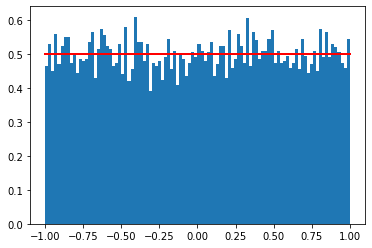

In [0]:
s = np.random.uniform(-1, 1, 10000)
count, bins, ignored = plt.hist(s, 100, density=True)
plt.plot(bins, np.ones_like(bins)/2, linewidth=2, color='r')
plt.show()

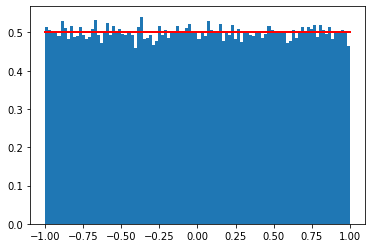

In [0]:
s = np.random.uniform(-1, 1, 100000)
count, bins, ignored = plt.hist(s, 100, density=True)
plt.plot(bins, np.ones_like(bins)/2, linewidth=2, color='r')
plt.show()

b) Wygeneruj 10 000 liczb z rozkładu normalnego o średniej 5 i odchyleniu standardowym 3.
Sporządź ich histogram z 100 przedziałami. Porównaj histogram z wykresem funkcji gęstości.
Powtórz obliczenia dla 100 000 liczb.


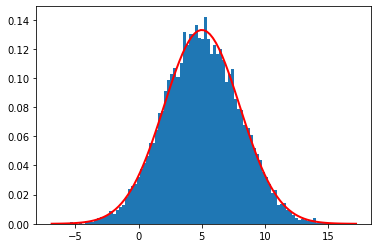

In [0]:
mu, sigma = 5, 3
s = np.random.normal(mu, sigma, 10000)
count, bins, ignored = plt.hist(s, 100, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
plt.show()

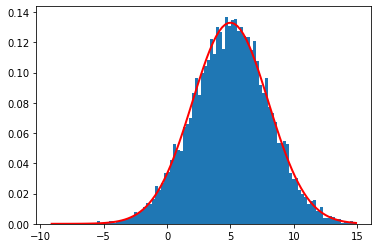

In [0]:
mu, sigma = 5, 3
s = np.random.normal(mu, sigma, 10000)
count, bins, ignored = plt.hist(s, 100, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
plt.show()

c) Wygeneruj 10 000 punktów (x, y), których współrzędna x ma rozkład normalny N(2, 5), zaś
współrzędna y ma rozkład normalny N(3, 1). Sporządź wykres tych punktów. Porównaj go z
wykresem funkcji gęstości. Powtórz obliczenia dla 100 000 punktów.
 

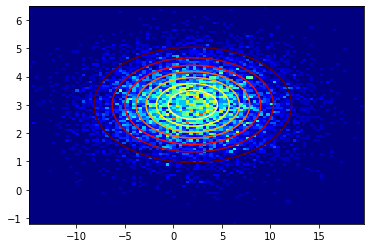

In [0]:
p_X1 = np.random.normal(2, 5, 10000)
p_Y1 = np.random.normal(3, 1, 10000)
a = plt.hist2d(p_X1,p_Y1, bins=(100, 100), cmap=plt.cm.jet)

N = 200
X1 = min(a[1])
X2 = max(a[1])
Y1 = min(a[2])
Y2 = max(a[2])
x,y = np.meshgrid(np.linspace(X1,X2,num = N),np.linspace(Y1,Y2,num = N))

pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
rv = sstats.multivariate_normal([2, 3], [[25, 0], [0, 1]])
plt.contour(x, y, rv.pdf(pos),cmap='hot')

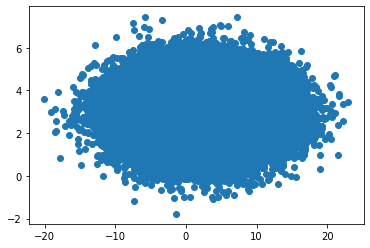

In [0]:
p_X = np.random.normal(2, 5, 100000)
p_Y = np.random.normal(3, 1, 100000)
plt.scatter(p_X,p_Y)

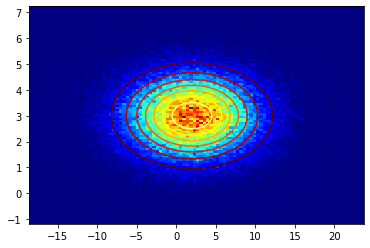

In [0]:
p_X = np.random.normal(2, 5, 100000)
p_Y = np.random.normal(3, 1, 100000)
a = plt.hist2d(p_X,p_Y, bins=(100, 100), cmap=plt.cm.jet)

N = 200
X1 = min(a[1])
X2 = max(a[1])
Y1 = min(a[2])
Y2 = max(a[2])
x,y = np.meshgrid(np.linspace(X1,X2,num = N),np.linspace(Y1,Y2,num = N))

pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
rv = sstats.multivariate_normal([2, 3], [[25, 0], [0, 1]])
plt.contour(x, y, rv.pdf(pos),cmap='hot')

d) Używając danych wygenerowanych w poprzednim punkcie oszacuj prawdopodobieństwo, że
X < Y dla zmiennych losowych X z rozkładem normalnym N(2, 5) i Y z rozkładem normalnym N(3,
1). Uzyskaną wartość porównaj z dokładnym prawdopodobieństwem takiego zdarzenia obliczonym
w oparciu o rachunek prawdopodobieństwa i statystykę.

In [0]:
print(f"Ppb X<Y na podstawie danych wynosi: {np.sum(p_X < p_Y)/100000 * 100}% na podsawie 100000 danych oraz {np.sum(p_X1 < p_Y1)/10000 * 100}% na podstawie 10000 danych")

Ppb X<Y na podstawie danych wynosi: 57.559000000000005% na podsawie 100000 danych oraz 57.940000000000005% na podstawie 10000 danych


P(X<Y) = P(X-Y<0)
Jeśli Z=X-Y, X ~ N(2,5), a Y ~ N(3,1) to Z ~ N(-1,sqrt(26)), ponieważ μ=μ1−μ2 oraz σ^2=(σ1)^2 + (σ2)^2
Potrzebujemy F_Z(0), czyli CDF dla Z w zerze

In [0]:
print(f"Ppb X<Y na podstawie obliczeń wynosi: {sstats.norm.cdf(0,-1,math.sqrt(26)) * 100}%")

Ppb X<Y na podstawie obliczeń wynosi: 57.774036626352995%


Zadanie 2. (1 punkt)

a) Niech x, y, w będą wektorami kolumnowymi ustalonej długości d. Policz:
- długość wektora x,
- średnią ważoną wektora x z wagami w,
- odległość euklidesową między wektorami x i y,
- iloczyn skalarny wektorów x i y.
Obliczenia przeprowadź dla losowo wygenerowanych wektorów x, y, w (dla d = 100).

In [0]:
def len_of_vect(V):
    return math.sqrt(np.sum(X**2))

def weighted_mean(V,W):
    return np.sum(V*W)/np.sum(W)

def euclidean_dist(X,Y):
    return math.sqrt(np.sum((X-Y)**2))

def dot_prod(X,Y):
    return np.sum(X*Y)

X = np.random.rand(100,1)
Y = np.random.rand(100,1)
W = np.random.rand(100,1)
len_of_vect(X),weighted_mean(X,W),euclidean_dist(X,Y),dot_prod(X,Y)

(5.897874441752794, 0.5117481407401184, 4.045959960405186, 24.634791096356143)

b) Niech X będzie macierzą ustalonego rozmiaru d x N zawierającą N wektorów kolumnowych
długości d. Niech y i w będą wektorami kolumnowymi długości d. Policz
- długości kolejnych wektorów z macierzy X (wyznacz wektor długości N zawierający te
długości), 
- średnią ważoną kolejnych wektorów z macierzy X z wagami w (wyznacz wektor długości N
zawierający te średnie),
- odległości euklidesowe między kolejnymi wektorami z macierzy X i wektorem y (wyznacz
wektor długości N zawierający te odległości),
- iloczyny skalarne kolejnych wektorów z macierzy X i wektora y (wyznacz wektor długości N
zawierający te iloczyny).
Obliczenia przeprowadź dla losowo wygenerowanej macierzy X i losowo wygenerowanych
wektorów y i w (dla d = 100 i N = 1000).

In [0]:
def lens_of_vects(M):
    return np.sum(M**2,axis=0)

def weighted_means(M,W):
    return np.sum(M*W,axis=0)/np.sum(W)

def euclidean_dists(M,Y):
    return np.sum((M-Y)**2,axis=0)**0.5

def dot_prods(M,Y):
    return np.sum(M*Y,axis=0)

N = 1000
d = 100

M = np.random.rand(d,N)
Y = np.random.rand(d,1)
W = np.random.rand(d,1)
lens_of_vects(M),weighted_means(M,W),euclidean_dists(M,Y),dot_prods(M,Y)

(array([29.13007472, 40.26041885, 35.55537075, 27.63263174, 29.50069723,
        33.48615657, 35.00355742, 36.8325959 , 28.50306876, 32.08135058,
        39.00993913, 38.9262544 , 35.69996965, 26.67000805, 31.40598831,
        32.77767787, 35.90966926, 36.36169091, 32.04645597, 30.31276927,
        34.22460024, 29.32145457, 28.7913358 , 32.3816285 , 30.98582175,
        31.93282406, 30.5224995 , 31.14530751, 34.79715825, 35.18970367,
        37.46581333, 31.14806118, 35.80032144, 40.43124387, 32.82587047,
        30.37451753, 28.34529832, 37.96976443, 30.42978973, 33.74086486,
        32.71279844, 33.73726632, 32.48100612, 38.56872535, 33.50191238,
        35.0016914 , 35.23662518, 29.83621875, 28.16575441, 29.4858751 ,
        37.31403476, 36.14630269, 32.23492917, 33.10398265, 31.88381729,
        41.49398929, 32.70582267, 35.42884925, 35.79604312, 33.0672554 ,
        33.55855092, 38.32572972, 33.2178587 , 33.64774452, 32.46505298,
        38.27678492, 30.49162347, 33.95879849, 30.8

Zadanie 3. (1 punkt)
a) Wczytaj dane IRIS. Można to szybko zrobić korzystając z biblioteki SciKit za pomocą polecenia: 


In [0]:
iris = datasets.load_iris() 

Zobacz co zawiera iris.data, iris.target, iris.feature_names, iris.target_names. 

In [0]:
iris.data,iris.target,iris.feature_names, iris.target_names

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

b) Przedstaw wczytane dane na wykresie w poniższy sposób (zwróć uwagę na kolory i typ
znaczników, opisy osi i tytuł wykresu):

<function matplotlib.pyplot.show>

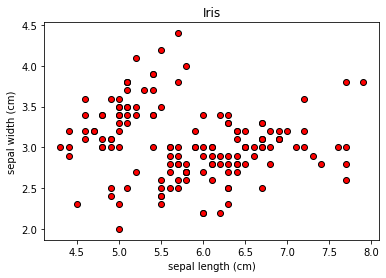

In [0]:
plt.scatter(iris.data[:,:1],iris.data[:,1:2],c='Red',edgecolor = "black")
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Iris')
plt.show

c) Zmień zakres osi: oś X powinna pokazywać wartości od 3 do 9, a oś Y od 1 do 5. 

<function matplotlib.pyplot.show>

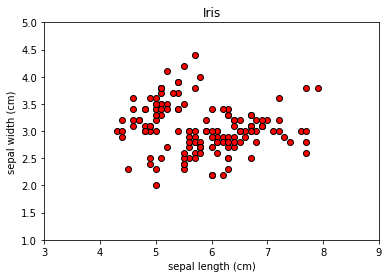

In [0]:
plt.scatter(iris.data[:,:1],iris.data[:,1:2],c='Red',edgecolor = "black")
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Iris')
plt.ylim(1,5)
plt.xlim(3,9)
plt.show

d) Zmień podziałki na osiach, tak aby zaznaczone były tylko liczby całkowite. 


<function matplotlib.pyplot.show>

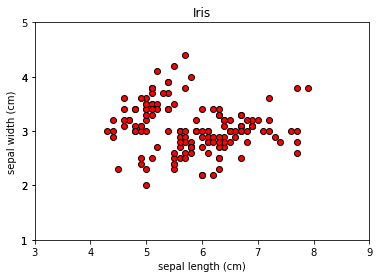

In [0]:
from matplotlib.ticker import MaxNLocator
plt.scatter(iris.data[:,:1],iris.data[:,1:2],c='Red',edgecolor = "black")
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Iris')
plt.ylim(1,5)
plt.xlim(3,9)
plt.yticks([int(e) for e in plt.yticks()[0]])
plt.show

e) Każdy gatunek irysa zaznacz innym kolorem. 

<function matplotlib.pyplot.show>

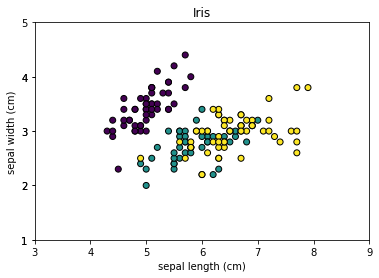

In [0]:
plt.scatter(iris.data[:,:1].ravel(),iris.data[:,1:2].ravel(),c=iris.target,edgecolor = "black")
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Iris')
plt.ylim(1,5)
plt.xlim(3,9)
plt.yticks([int(e) for e in plt.yticks()[0]])
plt.show



In [0]:
iris_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris_df = pd.read_csv(iris_url,header=None)
iris_df.columns = ['sepal_length (cm)', 'sepal_width (cm)', 'petal_length (cm)', 'petal_width (cm)', 'target']

Zadanie 4. (1 punkt)

a) Zrób rysunek podobny do tego z poprzedniego zadania, ale umieść na nim tylko irysy gatunku setosa i versicolor (nie rysuj irysów gatunku versicolor).


<function matplotlib.pyplot.show>

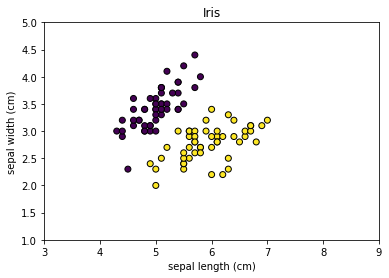

In [0]:
plt.scatter(iris.data[:100,:1].ravel(),iris.data[:100,1:2].ravel(),c=iris.target[:100],edgecolor = "black")
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Iris')
plt.ylim(1,5)
plt.xlim(3,9)
plt.show

b) Dodaj do rysunku prostą o równaniu y = 2 x – 8.

<function matplotlib.pyplot.show>

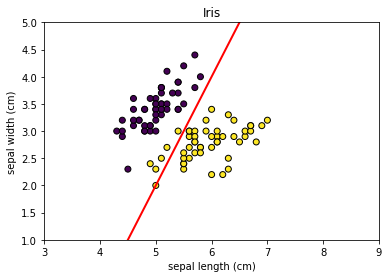

In [0]:
plt.scatter(iris.data[:100,:1].ravel(),iris.data[:100,1:2].ravel(),c=iris.target[:100],edgecolor = "black")
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Iris')
plt.ylim(1,5)
plt.xlim(3,9)
x = np.linspace(3,9,100)
y = 2*x - 8
plt.plot(x, y, linewidth=2, color='r')
plt.show

c) Irysy gatunku setosa znajdujące się pod narysowaną linią zaznacz na czerwono, pozostałe na zielono. Irysy gatunku virginica znajdujące się nad narysowaną linią zaznacz na czerwono,
pozostałe na zielono.

<function matplotlib.pyplot.show>

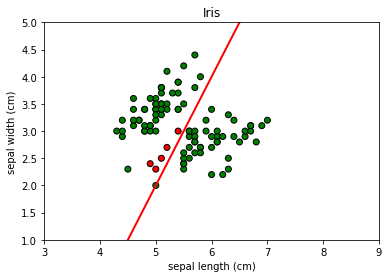

In [0]:
a = 2
b = -8
new_labels = [l if e[1] > a * e[0] + b else 1-l for e,l in zip(iris.data[:100],iris.target[:100])]
new_labels = ['Green' if not e else 'Red' for e in new_labels]
plt.scatter(iris.data[:100,:1].ravel(),iris.data[:100,1:2].ravel(),c=new_labels,edgecolor = "black")
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Iris')
plt.ylim(1,5)
plt.xlim(3,9)
x = np.linspace(3,9,100)
y = a * x + b
plt.plot(x, y, linewidth=2, color='r')
plt.show

d) Zapisz rysunek do pliku zadanie2a.png.

e) Spróbuj zmienić równanie prostej z punktu b) tak, aby zmniejszyć liczbę czerwonych punktów.

<function matplotlib.pyplot.show>

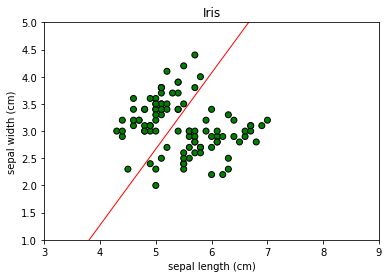

In [0]:
a = 1.4
b = -4.33
new_labels = [l if e[1] > a * e[0] + b else 1-l for e,l in zip(iris.data[:100],iris.target[:100])]
new_labels = ['Green' if not e else 'Red' for e in new_labels]
plt.scatter(iris.data[:100,:1].ravel(),iris.data[:100,1:2].ravel(),c=new_labels,edgecolor = "black")
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Iris')
plt.ylim(1,5)
plt.xlim(3,9)
x = np.linspace(3,9,100)
y = a * x + b
plt.plot(x, y, linewidth=1, color='r')
plt.show

f) Zapisz rysunek do pliku zadanie2b.png. 

Zadanie 5. (1 punkt)

a) Zrób rysunek przedstawiający 10 punktów o następujących współrzędnych (1, 10), (2, 10),
(3, 11), (4, 12), (5, 18), (6, 18), (7, 19), (8, 26), (9, 19), (10, 26).


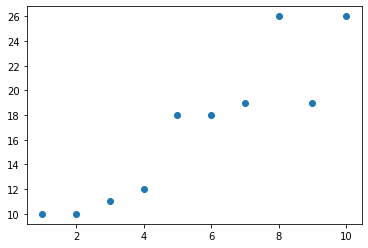

In [0]:
x = np.arange(1,11)
y = np.array([10,10,11,12,18,18,19,26,19,26])
plt.scatter(x,y)

b) Dodaj do rysunku prostą o równaniu y = 2 x + 5.


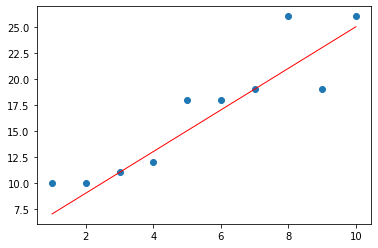

In [0]:
x = np.arange(1,11)
y = np.array([10,10,11,12,18,18,19,26,19,26])
data = np.array([x,y])

a = 2
b = 5
x2 = np.linspace(1,10,100)
y2 = a*x2+b

plt.scatter(x,y)
plt.plot(x2,y2,linewidth=1, color='r')

plt.show()

c) Zapisz rysunek do pliku zadanie3a.png.

d) Dla każdego punktu danych policz jego odległość od wyznaczonej prostej. 

In [0]:
def dist_to_line(data,a,b):
    return np.abs(np.sum(data * np.array([-a,1]).reshape(2,1),axis=0) - b) / math.sqrt(a**2 + 1)

dist_to_line(data,a,b),np.sum(dist_to_line(data,a,b))

(array([1.34164079, 0.4472136 , 0.        , 0.4472136 , 1.34164079,
        0.4472136 , 0.        , 2.23606798, 1.78885438, 0.4472136 ]),
 8.497058314499201)

e) Spróbuj zmienić równanie prostej z punktu b) tak, aby zmniejszyć sumę odległości punktów
danych od prostej.

In [0]:
dist = np.sum(dist_to_line(data,a,b))
min_a = 2
min_b = 5
for new_a in np.arange(1,3,.1):
    for new_b in np.arange(0,10,.1):
        new_s = np.sum(dist_to_line(data,new_a,new_b))
        if new_s < dist:
            dist = new_s
            min_a = new_a
            min_b = new_b

min_a,min_b

(2.000000000000001, 6.0)

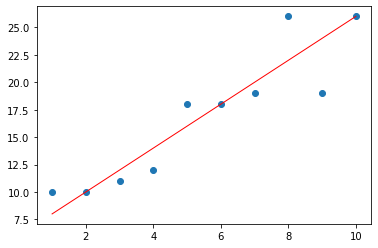

(array([8.94427191e-01, 7.94410929e-16, 4.47213595e-01, 8.94427191e-01,
        8.94427191e-01, 2.38323279e-15, 4.47213595e-01, 1.78885438e+00,
        2.23606798e+00, 3.17764372e-15]), 7.602631123499291)

In [0]:
x = np.arange(1,11)
y = np.array([10,10,11,12,18,18,19,26,19,26])
data = np.array([x,y])

a = min_a
b = min_b
x2 = np.linspace(1,10,100)
y2 = a*x2+b

plt.scatter(x,y)
plt.plot(x2,y2,linewidth=1, color='r')

plt.show()

dist_to_line(data,a,b),np.sum(dist_to_line(data,a,b))

f) Zapisz rysunek do pliku zadanie3b.png. 

Zadanie 6. (1 punkt)

Napisz program generujący zestaw dwuwymiarowych danych losowych złożony z K chmur
punktów, taki że:

a) każda chmura punktów składała się z 1000 punktów o współrzędnych (x, y), gdzie x pochodzi z rozkładu normalnego N(ai, 1), y pochodzi z rozkładu normalnego N(bi, 1), zaś (ai, bi) to centrum itej chmury punktów

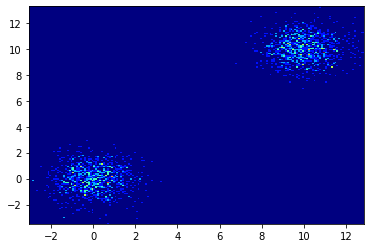

In [0]:
K = 2
centers = np.array([[i for i in range(0,K*10,10)],[i for i in range(0,K*10,10)]])
p_X = np.array([])
p_Y = np.array([])
for i in range(centers.shape[1]):
    p_X = np.concatenate((p_X,np.random.normal(centers[0][i], 1, 1000)))
    p_Y = np.concatenate((p_Y,np.random.normal(centers[1][i], 1, 1000)))

a = plt.hist2d(p_X,p_Y,bins=175, cmap=plt.cm.jet)

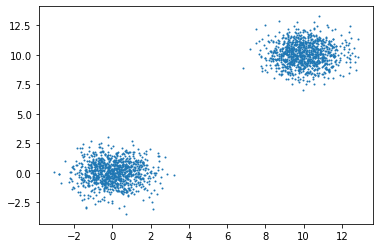

In [0]:
plt.scatter(p_X,p_Y,s=1)

b) centra chmur punktów (ai, bi) tworzą wielokąt foremny o boku o zadanej długości d. Uruchom program dla K = 7, K = 11 i K = 23 oraz d = 5, d = 10 i d = 15. Zrób rysunki
przedstawiające wyniki.


In [0]:
def point_cloud(K,d):
    R = d/(2*np.sin(np.pi/K))
    centers = np.array([[np.sin(i)*R for i in np.arange(0,2*np.pi,2*np.pi/K)],
                        [np.cos(i)*R for i in np.arange(0,2*np.pi,2*np.pi/K)]])
    p_X = np.array([])
    p_Y = np.array([])
    for i in range(centers.shape[1]):
        p_X = np.concatenate((p_X,np.random.normal(centers[0][i], 1, 1000)))
        p_Y = np.concatenate((p_Y,np.random.normal(centers[1][i], 1, 1000)))
    return p_X,p_Y

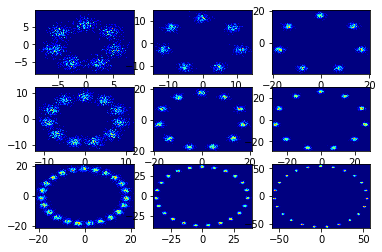

In [0]:
Ks = [7,11,23]
ds = [5,10,15]
fig,axs = plt.subplots(3,3)
for i in range(3):
    for j in range(3):
        p_X,p_Y = point_cloud(Ks[i],ds[j])
        axs[i,j].hist2d(p_X,p_Y,bins=175, cmap=plt.cm.jet)

<function matplotlib.pyplot.show>

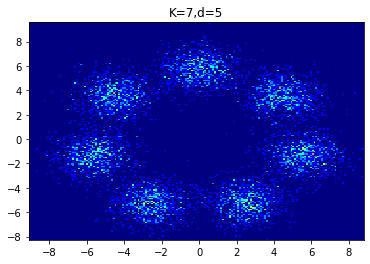

In [0]:
p_X,p_Y = point_cloud(7,5)
a = plt.hist2d(p_X,p_Y,bins=175, cmap=plt.cm.jet)
plt.title("K=7,d=5")
plt.show

<function matplotlib.pyplot.show>

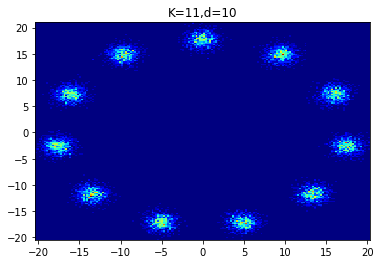

In [0]:
p_X,p_Y = point_cloud(11,10)
a = plt.hist2d(p_X,p_Y,bins=175, cmap=plt.cm.jet)
plt.title("K=11,d=10")
plt.show

<function matplotlib.pyplot.show>

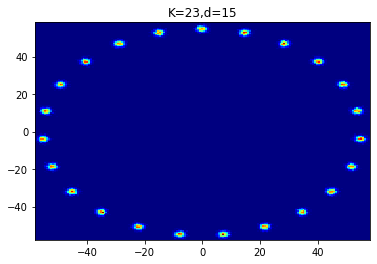

In [0]:
p_X,p_Y = point_cloud(23,15)
a = plt.hist2d(p_X,p_Y,bins=175, cmap=plt.cm.jet)
plt.title("K=23,d=15")
plt.show

Zadanie 7. (1 punkt)

Dla danych z poprzedniego zadania policz odległość każdego punktu danych od każdego centrum
chmury i na sporządzonych wykresach zaznacz kolorem czerwonym te punkty danych, które
znajdują się bliżej centrum innej chmury niż chmury, z której pochodzą, a kolorem zielonym
pozostałe punkty danych. Jak zależy frakcja punktów czerwonych od długości d? Jaka powinna
być wartość d, żeby punkty czerwone stanowiły około 10% wszystkich punktów danych? 

In [0]:
def point_cloud_with_centers(K,d):
    R = d/(2*np.sin(np.pi/K))
    centers = np.array([[np.sin(i)*R for i in np.arange(0,2*np.pi,2*np.pi/K)],
                        [np.cos(i)*R for i in np.arange(0,2*np.pi,2*np.pi/K)]])
    p_X = np.array([])
    p_Y = np.array([])
    for i in range(centers.shape[1]):
        p_X = np.concatenate((p_X,np.random.normal(centers[0][i], 1, 1000)))
        p_Y = np.concatenate((p_Y,np.random.normal(centers[1][i], 1, 1000)))
    return p_X,p_Y,centers

In [0]:
def dists_matrix(X,Y):
    # X = [[v11,v21,v31,...,vn1], 
    #      [v12,v22,v32,...,vn2],
    #      ...
    #      [v1k,v2k,v3k,...,vnk]]
    # Y = [[u11,u21,u31,...,um1], 
    #      [u12,u22,u32,...,um2],
    #      ...
    #      [u1k,u2k,u3k,...,umk]]
    # res = [[dist(v1,u1),dist(v2,u1),dist(v3,u1),...,dist(vn,u1)],
    #        [dist(v1,u2),dist(v2,u2),dist(v3,u2),...,dist(vn,u2)],
    #        [dist(v1,u3),dist(v2,u3),dist(v3,u3),...,dist(vn,u3)],
    #        ...
    #        [dist(v1,um),dist(v2,um),dist(v3,um),...,dist(vn,um)]]
    # dist = sum((vni - umi)**2), for i = 0 to k
    return -2 * np.dot(Y.T, X) + np.sum(X.T**2,axis=1) + np.sum(Y.T**2, axis=1)[:, np.newaxis]

In [0]:
def err_tabel(K,d):
    X,Y,centers = point_cloud_with_centers(K,d)
    dists = dists_matrix(np.array([X,Y]),centers)
    min_dists = dists.min(axis=0)
    err = np.array([dists[i//1000,i] == min_dists[i] for i in range(K*1000)])
    num_of_errs = (1000*K - np.sum(err))/(10*K)
    return X,Y,np.array(['Green' if x else 'Red' for x in err]),num_of_errs


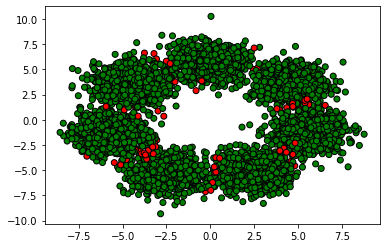

In [0]:
X,Y,err,n = err_tabel(7,5)
plt.scatter(X,Y,c=err,edgecolor = "black")

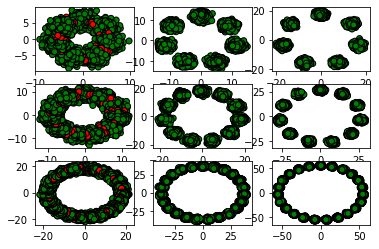

In [0]:
Ks = [7,11,23]
ds = [5,10,15]
fig,axs = plt.subplots(3,3)
for i in range(3):
    for j in range(3):
        X,Y,err,n = err_tabel(Ks[i],ds[j])
        axs[i,j].scatter(X,Y,c=err,edgecolor = "black")

In [0]:
def err_to_d(K):
    D = np.arange(1,10,0.5)
    Y = []
    for d in D:
        _,__,___,n = err_tabel(K,d)
        Y.append(n)
    return D,np.array(Y)

<function matplotlib.pyplot.show>

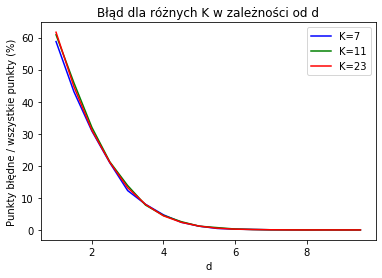

In [0]:
Ds7,errs7 = err_to_d(7)
Ds11,errs11 = err_to_d(11)
Ds23,errs23 = err_to_d(23)
plt.plot(Ds7,errs7,color = 'blue',label = "K=7")
plt.plot(Ds11,errs11,color = 'green',label = "K=11")
plt.plot(Ds23,errs23,color = 'red',label = "K=23")
plt.xlabel('d')
plt.ylabel('Punkty błędne / wszystkie punkty (%)')
plt.title('Błąd dla różnych K w zależności od d')
plt.legend(loc='upper right')
plt.show